In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Reading csv file from github repo
# url = "https://raw.githubusercontent.com/devzohaib/Simple-Linear-Regression/master/tvmarketing.csv"
# advertising = pd.read_csv(url)

advertising = pd.read_csv(filepath_or_buffer='tvmarketing.csv')


In [2]:
# advertising.info()

# Display the first 5-rows
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [3]:
# Display the last 5-rows
advertising.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [4]:
# summary of a DataFrame including index dtype and columns, non-null values and memory usage.
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [5]:
# Check the shape of the DataFrame
advertising.shape

(200, 2)

In [6]:
# Look at some statistical info about the DataFrame
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


# Visualizing Data Using Plot

<Axes: xlabel='TV', ylabel='Sales'>

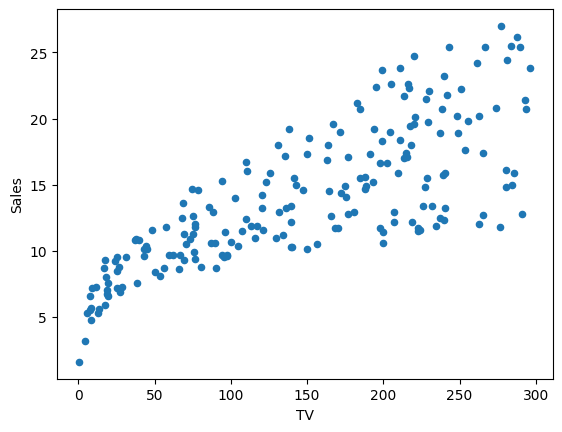

In [7]:
# visualize the relationShip between the features and the response using scatterplots
advertising.plot(x='TV', y='Sales',kind='scatter')

# Perfroming Simple Linear Regression
Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

### Generic Steps in Model Building using ```sklearn```

Before you read further, it is good to understand the generic structure of modeling using the scikit-learn library. Broadly, the steps to build any model can be divided as follows: 

## Preparing X and y

-  The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.
-  However, X can be a dataframe as Pandas is built over NumPy.

In [8]:
# putting feature variable to X
X = advertising["TV"]
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [9]:
# putting respose variable to y
y = advertising['Sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [10]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,train_size=0.7,random_state=0)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# this is no the shape we want :
# ((140,), (60,), (140,), (60,))
# we want : ((140,1), (60,1), (140,1), (60,1))

((140,), (60,), (140,), (60,))

In [12]:
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((140, 1), (60, 1), (140,), (60,))

In [13]:
# Create linear-regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [14]:
print(lr.intercept_)
print(lr.coef_)

7.310810165411681
[0.04581434]


$y = 7.310810165411681 + 0.0464 \times TV $<br>

Now, let's use this equation to predict our sales.

In [15]:
# Make prediction on the testing data
y_pred = lr.predict(X_test)
y_pred[:5]

array([10.48116264,  9.60152727, 11.4524267 , 20.58322509, 15.1084112 ])

In [16]:
y_pred.shape


(60,)

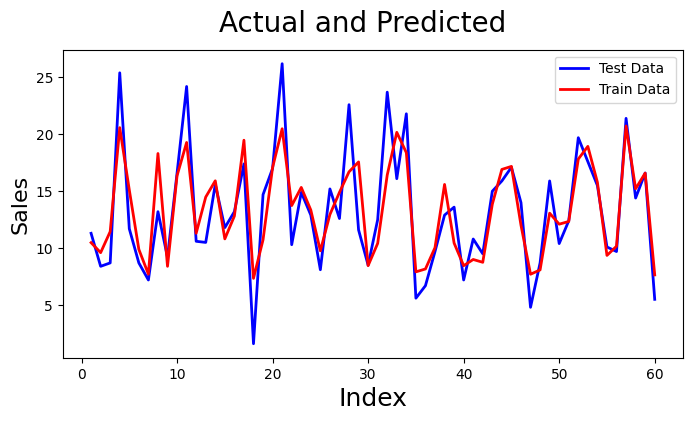

In [17]:
# Actual vs Predicted

c = [i for i in range(1, 61, 1)]  # generating index
fig = plt.figure(figsize=(8, 4))

plt.plot(c, y_test, color="blue", linewidth=2, linestyle="-", label= 'Test Data')
plt.plot(c, y_pred, color="red", linewidth=2, linestyle="-", label="Train Data")
fig.suptitle("Actual and Predicted", fontsize=20)  # Plot heading
plt.xlabel("Index", fontsize=18)  # X-label
plt.ylabel("Sales", fontsize=16)  # Y-label
plt.legend()
plt.show()

In [18]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean_Squared_Error :", mse)
print("r_square_value :", r_squared) # it is like a score of accuracy
# this mse =7.9 means that this model is not able to match the 7.9 percent of the values
# r2 means that your model is 72% is accurate on test data .


Mean_Squared_Error : 7.497479593464674
r_square_value : 0.725606346597073
